# Predicting on getting a match on a speed date!

** First we import all libraries and read in the datafile.

In [1]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv("speed_date.csv")
df.describe()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


** Use .head .describe and a boxplot to check for weird or missing values. 

In [2]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

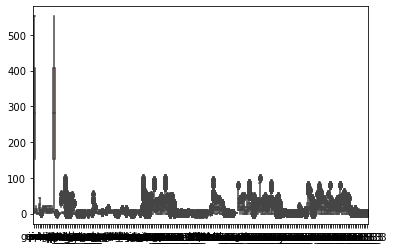

In [3]:
sns.boxplot(data=df)

** Subset all relevant colums that can be used to predict a match. Save as new dataset.

In [4]:
df1 = df[["gender", "match","age", "race", "field_cd", "imprace", "imprelig", "goal", "date", "go_out", "career_c", "exphappy", "expnum"]]
df1.head()

,gender,match,age,race,field_cd,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum
0,0,0,21.0,4.0,1.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
1,0,0,21.0,4.0,1.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
2,0,1,21.0,4.0,1.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
3,0,1,21.0,4.0,1.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
4,0,1,21.0,4.0,1.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0


** Drop all missing values. And check for outliers in a boxplot and with .describe.

In [5]:
df1 = df1.dropna()
df1.describe()

,gender,match,age,race,field_cd,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum
count,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000
mean,0.516370,0.184377,25.192418,2.714532,6.365882,3.780011,3.848363,2.254451,4.995979,2.062033,4.816772,5.553130,5.628374
std,0.499876,0.387903,3.589619,1.248706,3.925157,2.851169,2.972476,1.655412,1.466674,1.152035,3.240951,1.602501,4.800776
min,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,22.000000,2.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,5.000000,2.000000
50%,1.000000,0.000000,25.000000,2.000000,8.000000,3.000000,3.000000,2.000000,5.000000,2.000000,5.000000,6.000000,4.000000
75%,1.000000,0.000000,27.000000,4.000000,9.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,7.000000,8.000000
max,1.000000,1.000000,39.000000,6.000000,16.000000,10.000000,10.000000,6.000000,7.000000,7.000000,14.000000,10.000000,20.000000


<AxesSubplot:>

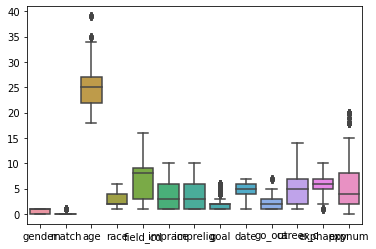

In [6]:
sns.boxplot(data=df1)

** Define our X and y variable and create train and test sets by splitting the dataset.

In [7]:
X = df1.loc[:, ~df1.columns.isin(["match"])]
Y = df1["match"]

X = normalize(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.036588,0.841526,0.146352,0.182940,0.036588,0.219529,0.073176,0.256117,0.146352,0.182940,0.219529,0.109764
1,0.000000,0.861605,0.063823,0.095734,0.159556,0.255290,0.063823,0.191468,0.063823,0.223379,0.223379,0.095734
2,0.000000,0.847319,0.060523,0.181568,0.181568,0.272352,0.151307,0.151307,0.060523,0.181568,0.151307,0.181568
3,0.030875,0.833635,0.061751,0.308754,0.185252,0.247003,0.061751,0.154377,0.092626,0.061751,0.247003,0.092626
4,0.000000,0.879292,0.109911,0.036637,0.219823,0.146549,0.183186,0.219823,0.146549,0.036637,0.073274,0.183186


** Create empty shell and fit it to train the model.

In [11]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.7724665391969407

** As you can see, this model predicts 77% of the time accurate. You can see the test results in the following confusion matrix.

In [18]:
Y_test_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_test_pred)
conf_matrix = pd.DataFrame(cm, index=['No match (actual)', 'Match (actual)'], columns = ['No match (predicted)', 'Match (predicted)'])
conf_matrix

,No match (predicted),Match (predicted)
No match (actual),387,28
Match (actual),91,17
